<a href="https://colab.research.google.com/github/vinods03/deep_learning/blob/main/CNN_Animal_Multi_Class_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image Classification Problem
Includes Strided Convolution layer, GlobalMaxPooling / Flatten, Dense, Batch Normalization, Data Augmentation.
We also see the misclassified examples and predict the class given an image.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [3]:
pwd

'/content'

In [4]:
base_dir = '/content/drive/MyDrive/raw-img'

In [5]:
import os

dataset = []

for i in os.listdir(base_dir):
    dataset.append(os.path.join(base_dir, i))

In [6]:
dataset

['/content/drive/MyDrive/raw-img/pecora',
 '/content/drive/MyDrive/raw-img/mucca',
 '/content/drive/MyDrive/raw-img/gallina',
 '/content/drive/MyDrive/raw-img/elefante',
 '/content/drive/MyDrive/raw-img/scoiattolo',
 '/content/drive/MyDrive/raw-img/cavallo',
 '/content/drive/MyDrive/raw-img/gatto',
 '/content/drive/MyDrive/raw-img/ragno',
 '/content/drive/MyDrive/raw-img/cane',
 '/content/drive/MyDrive/raw-img/farfalla']

In [7]:
dataset.remove('/content/drive/MyDrive/raw-img/gallina')
dataset.remove('/content/drive/MyDrive/raw-img/elefante')
dataset.remove('/content/drive/MyDrive/raw-img/scoiattolo')
dataset.remove('/content/drive/MyDrive/raw-img/cavallo')
dataset.remove('/content/drive/MyDrive/raw-img/gatto')
dataset.remove('/content/drive/MyDrive/raw-img/ragno')
dataset.remove('/content/drive/MyDrive/raw-img/cane')
dataset

['/content/drive/MyDrive/raw-img/pecora',
 '/content/drive/MyDrive/raw-img/mucca',
 '/content/drive/MyDrive/raw-img/farfalla']

In [8]:
# translate = {"cane": "dog", "cavallo": "horse", "elefante": "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "pecora": "sheep", "scoiattolo": "squirrel", "dog": "cane", "cavallo": "horse", "elefante" : "elephant", "farfalla": "butterfly", "gallina": "chicken", "gatto": "cat", "mucca": "cow", "ragno": "spider"}
# translate = {'cane': 1, 'cavallo': 2, 'elefante': 3, 'farfalla': 4, 'gallina': 5, 'gatto': 6, 'mucca': 7, 'pecora': 8, 'scoiattolo': 9, 'dog': 10, 'cavallo': 11, 'elefante' : 12, 'farfalla': 13, 'gallina': 14, 'gatto': 15, 'mucca':16, 'ragno': 17}
translate = {'farfalla': 0, 'pecora': 1, 'mucca': 2, 'gallina': 3, 'elefante': 4, 'scoiattolo': 5, 'cane': 6, 'cavallo': 7, 'gatto': 8, 'ragno': 9}

In [9]:
for i in dataset:
    name = i.split('/')[-1]
    print(name , "is translated as" , translate[name] , "and folder length is" , len(os.listdir(i)))

pecora is translated as 1 and folder length is 1820
mucca is translated as 2 and folder length is 1740
farfalla is translated as 0 and folder length is 2112


In [10]:
# convert 1 sample image into a 3D array

from tensorflow.keras.preprocessing.image import load_img, img_to_array
img = load_img('/content/drive/MyDrive/raw-img/cavallo/OIP-_-5DDAGLz1A9FyrB0FLdgwHaFw.jpeg')
# img = tf.image.resize(img, (224, 224))
img = img_to_array(img)
img = img/255

print(img.shape)
# img

(233, 300, 3)


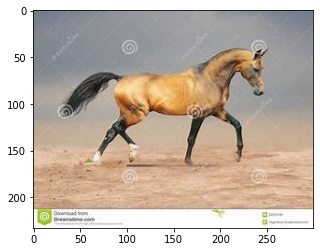

In [11]:
# get back the image from the array

import matplotlib.pyplot as plt
plt.imshow(img)

In [12]:
image_array = []
image_label = []

for i in dataset:
    for n , j in enumerate(os.listdir(i)):
        
        if (n < 1001):
            img_path = os.path.join(i , j)
            img = load_img(img_path, target_size=(256, 256))
            # img = load_img(img_path, color_mode = 'rgb')
            # img = load_img(img_path)
            img = img_to_array(img)
            img = img/255
            image_array.append(img)
    #         print(img.shape)
    #         img
            l = i.split('/')[-1]
            image_label.append(translate[l])

In [13]:
image_array[0]
image_label[0]

1

In [14]:
import numpy as np

image_array = np.array(image_array)
image_label = np.array(image_label)

In [15]:
print(image_array.shape)
print(image_label.shape)

(3003, 256, 256, 3)
(3003,)


In [16]:
set(image_label)

{0, 1, 2}

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(image_array, image_label, test_size = 0.25)

In [18]:
# y_train
# y_test

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2252, 256, 256, 3)
(751, 256, 256, 3)
(2252,)
(751,)


In [20]:
# y_train
# y_test

In [21]:
# number of classes

c = len(set(y_train))
print(c)

d = len(set(y_test))
print(d)

3
3


In [22]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [23]:
# Build the model
# First Trial - Naive model

# X_train[0].shape
# i = Input(shape = X_train[0].shape)

# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)

# x = Flatten()(x)
# x = Dropout(0.2)(x)
# x = Dense(128, activation = 'relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(c, activation = 'softmax')(x)
# model = Model(i, x)

# Result
# Epoch 15/15
# 15/15 [==============================] - 1s 44ms/step - loss: 0.0380 - accuracy: 0.9845 - val_loss: 1.7235 - val_accuracy: 0.6623

In [24]:
# Build the model
# Second Trial - Using Global Max Pooling instead of Flatten because imaages are of different sizes

# X_train[0].shape
# i = Input(shape = X_train[0].shape)

# x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
# x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
# x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)

# x = GlobalMaxPooling2D()(x)
# x = Dropout(0.2)(x)
# x = Dense(128, activation = 'relu')(x)
# x = Dropout(0.2)(x)
# x = Dense(c, activation = 'softmax')(x)
# model = Model(i, x)

# Result
# Epoch 15/15
# 15/15 [==============================] - 1s 39ms/step - loss: 0.6194 - accuracy: 0.7124 - val_loss: 0.7669 - val_accuracy: 0.6291

# Result after increasing the number of samples from 200 to 700
# Epoch 15/15
# 50/50 [==============================] - 46s 916ms/step - loss: 0.4268 - accuracy: 0.8110 - val_loss: 0.5191 - val_accuracy: 0.7681

# Result after increasing the number of samples to 1000. Memory crash beyond this
# Epoch 15/15
# 71/71 [==============================] - 3s 40ms/step - loss: 0.3371 - accuracy: 0.8579 - val_loss: 0.5472 - val_accuracy: 0.7696

In [25]:
# Build the model
# Third Trial - Using Batch Normalization after every Conv layer

X_train[0].shape
i = Input(shape = X_train[0].shape)

x = Conv2D(32, (3,3), strides = 2, activation = 'relu', padding = 'same')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)
x = Conv2D(256, (3,3), strides = 2, activation = 'relu', padding = 'same')(x)
x = BatchNormalization()(x)

x = GlobalMaxPooling2D()(x)
# x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(256, activation = 'relu')(x)

# Multiple layers seemedto result in overfitting. training accuracy was improving but test data accuracy was decreasing
# x = Dropout(0.2)(x)
# x = Dense(128, activation = 'relu')(x) # Added another dense layer
# x = Dropout(0.2)(x)
# x = Dense(64, activation = 'relu')(x) # Added another dense layer

x = Dropout(0.2)(x)
x = Dense(c, activation = 'softmax')(x)
model = Model(i, x)

# Result
# Epoch 15/15
# 71/71 [==============================] - 3s 44ms/step - loss: 0.4546 - accuracy: 0.7913 - val_loss: 0.4954 - val_accuracy: 0.7856
# Slightly better than second Trial but the difference between training accuracy and validation aaccuracy is smaller -> so less over-fitting

In [26]:
# compile and fit

# opt = tf.keras.optimizers.Adam(0.01)
# model.compile(optimizer = opt,  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.compile(optimizer = 'adam',  loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)

Epoch 1/15
71/71 [==============================] - 17s 69ms/step - loss: 1.4810 - accuracy: 0.5280 - val_loss: 1.2911 - val_accuracy: 0.3236
Epoch 2/15
71/71 [==============================] - 3s 49ms/step - loss: 0.8190 - accuracy: 0.6332 - val_loss: 1.6196 - val_accuracy: 0.3236
Epoch 3/15
71/71 [==============================] - 3s 48ms/step - loss: 0.7286 - accuracy: 0.6852 - val_loss: 1.5818 - val_accuracy: 0.3236
Epoch 4/15
71/71 [==============================] - 3s 49ms/step - loss: 0.6206 - accuracy: 0.7185 - val_loss: 1.8127 - val_accuracy: 0.3276
Epoch 5/15
71/71 [==============================] - 3s 49ms/step - loss: 0.5792 - accuracy: 0.7353 - val_loss: 2.4253 - val_accuracy: 0.3276
Epoch 6/15
71/71 [==============================] - 4s 49ms/step - loss: 0.5311 - accuracy: 0.7735 - val_loss: 1.2685 - val_accuracy: 0.4115
Epoch 7/15
71/71 [==============================] - 3s 49ms/step - loss: 0.4784 - accuracy: 0.7846 - val_loss: 1.4503 - val_accuracy: 0.5126
Epoch 8/15
7

In [27]:
# Add data augmentation on top of Batch Normalization
# Fourth trial
# Data augmentation did not help here. Also we have enough images. So data augmentation not needed here actually.

# batch_size = 32
# data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, horizontal_flip = True)
# train_generator = data_generator.flow(X_train, y_train, batch_size)
# steps_per_epoch = X_train.shape[0] // batch_size

# r = model.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch = steps_per_epoch, epochs = 10)

# Result
# Epoch 15/15
# 70/70 [==============================] - 28s 393ms/step - loss: 0.4897 - accuracy: 0.7788 - val_loss: 0.5270 - val_accuracy: 0.7617
# Slighly lower or almost same as second & third trials but the difference between training accuracy and validation accuracy is small again -> so less over-fitting agaain

In [28]:
y_test_pred = model.predict(X_test)

In [29]:
# y_test_pred

In [30]:
# y_test_pred[0]
# max(y_test_pred[0])

y_test_pred_decoded = []

for i in range (0,len(y_test)):
    for j in range(0,3):
        if y_test_pred[i][j] == max(y_test_pred[i]):
            y_test_pred_decoded.append(j)

print(len(y_test_pred_decoded))

# y_test_pred_decoded

751


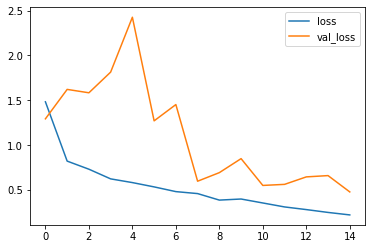

In [31]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

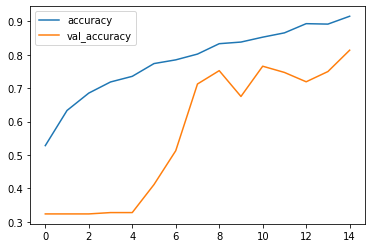

In [32]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

In [33]:
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test, y_test_pred_decoded)
accuracy = metrics.accuracy_score(y_test, y_test_pred_decoded)
error = 1 - accuracy
precision = metrics.precision_score(y_test, y_test_pred_decoded, average = 'weighted')
recall = metrics.recall_score(y_test, y_test_pred_decoded, average = 'weighted')
f1 = metrics.f1_score(y_test, y_test_pred_decoded, average = 'weighted')

print('accuracy: ', accuracy)
print('error: ', error)
print('precision: ', precision)
print('recall: ', recall)
print('f1: ', f1)

print('\n')
print('The confusion matrix is: ')
print(cm)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred_decoded))

accuracy:  0.8135818908122503
error:  0.1864181091877497
precision:  0.8119495390728486
recall:  0.8135818908122503
f1:  0.8124177708210912


The confusion matrix is: 
[[223   7  11]
 [ 17 184  42]
 [ 15  48 204]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90       241
           1       0.77      0.76      0.76       243
           2       0.79      0.76      0.78       267

    accuracy                           0.81       751
   macro avg       0.81      0.82      0.81       751
weighted avg       0.81      0.81      0.81       751



[  1   5   6   8  13  15  17  19  26  46  47  50  54  55  63  67  72  73
  82  88  89  90  93  98 101 118 120 139 144 150 161 163 165 166 169 178
 186 194 197 199 200 208 211 213 215 217 221 227 228 237 238 242 248 252
 262 265 270 276 284 293 306 311 313 317 323 332 333 337 347 358 362 363
 378 383 386 392 393 396 399 402 407 409 411 414 418 424 433 443 444 447
 459 461 464 480 484 489 492 506 510 514 519 520 522 523 525 529 546 552
 553 557 560 562 567 575 591 599 606 622 628 638 640 653 655 658 667 682
 685 693 697 701 704 711 715 716 732 735 740 744 749 750]


The index chosen for analysis from X_test is:  313
Actual value:  pecora
Predicted value:  mucca


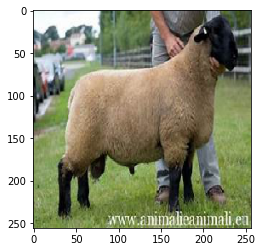

In [34]:
# Lets look at misclassified data

# list of all misclassifications

misclassified_data = np.where(y_test != y_test_pred_decoded)
misclassified_data_idx = np.where(y_test != y_test_pred_decoded)[0]
print(misclassified_data_idx)
print('\n')

# analyze one misclassification 

# translate = {'farfalla': 0, 'pecora': 1, 'mucca': 2}
reverse_translate = {0:'farfalla', 1:'pecora', 2:'mucca'}

i = np.random.choice(misclassified_data_idx)
print('The index chosen for analysis from X_test is: ', i)
plt.imshow(X_test[i])
print('Actual value: ', reverse_translate[y_test[i]])
print('Predicted value: ', reverse_translate[y_test_pred_decoded[i]])

In [35]:
# Now given an image, lets predict


# y_test_pred = model.predict(X_test)

X_test.shape

img = load_img('/content/drive/MyDrive/raw-img/pecora/OIP-ZYzxmhrBXfvdySrXprqM5AHaE9.jpeg', target_size=(256, 256))
img = img_to_array(img)
img = img/255
img = np.expand_dims(img, axis=0)
img.shape

y_test_pred = model.predict(img)
y_test_pred_lst = list(y_test_pred[0])
y_test_pred_lst_max = max(y_test_pred_lst)
print('The image is a ' , reverse_translate[y_test_pred_lst.index(y_test_pred_lst_max)])


The image is a  pecora
